In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick

from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report

from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.feature_selection import RFE

Проверьте себя, знакомы ли вам эти понятия

- перцентиль
- математическое ожидание случайной дискретной величины
- дисперсия случайной дискретной величины, стандартное отклонение
- константный (постоянный) признак
- сбалансированная выборка, баланс классов
- шкалирование и нормализация признаков
- точность, полнота
- регуляризация модели
- хи-квадрат тест
- взаимная информация
- F-тест или критерий Фишера


https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [2]:
# 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
# смотрим первые строки

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Diabetes_binary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HighBP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
HighChol,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
CholCheck,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,26.0,26.0,26.0,28.0,29.0,18.0,26.0,31.0,32.0,27.0
Smoker,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
Stroke,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PhysActivity,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
Fruits,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Методы отбора предикторов

# Фильтрация

Будем считать, что экспертная оценка уже проведена

## Визуальная оценка

In [4]:
# процент дублей 

(len(df)-len(df.drop_duplicates()))*100/len(df)

2.3128501103378034

In [5]:
# удаление дубликатов

df = df.drop_duplicates()

In [6]:
# инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69057 entries, 0 to 70691
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth           

In [7]:
#описание датасета

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,69057.0,0.508232,0.499936,0.0,0.0,1.0,1.0,1.0
HighBP,69057.0,0.571224,0.494905,0.0,0.0,1.0,1.0,1.0
HighChol,69057.0,0.531329,0.499021,0.0,0.0,1.0,1.0,1.0
CholCheck,69057.0,0.974803,0.156723,0.0,1.0,1.0,1.0,1.0
BMI,69057.0,29.955834,7.147972,12.0,25.0,29.0,33.0,98.0
Smoker,69057.0,0.481935,0.499677,0.0,0.0,0.0,1.0,1.0
Stroke,69057.0,0.063643,0.244118,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,69057.0,0.150875,0.357930,0.0,0.0,0.0,0.0,1.0
PhysActivity,69057.0,0.696483,0.459780,0.0,0.0,1.0,1.0,1.0
Fruits,69057.0,0.605659,0.488712,0.0,0.0,1.0,1.0,1.0


SURPRISE!!!

вопросы на самопроверку:
- как определить константный признак по стандартному отклонению?
- равносильны ли высказывания: "среднеквадратичное отклонение равно нулю" и "максимальное значение случайной величины равно минимальному"? Почему?

Формула стандартного отклонения (в нашей практике стандартное отклонение = среднеквадратичное отклонение = квадратный корень из дисперсии)

$\sigma = \sum_{1}^{n}\sqrt{\frac{1}{n}(x_i - \overline{x})^2}$

In [8]:
# удалим неинформативный признак

df = df.drop('surprise', axis=1)

In [9]:
# выделим типы предикторов и отделим таргет

target = 'Diabetes_binary'

bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels=target))
num_vars = [var for var in df.columns if var not in bool_vars and var!=target]

In [10]:
# print(target, bool_vars, num_vars)

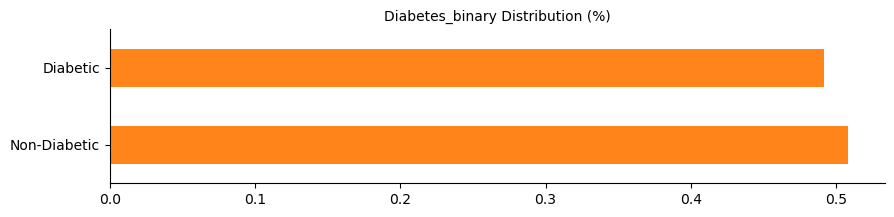

In [11]:
# проверим, сбалансированы ли классы

df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2), 
                                           color='#FF851B').spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=10)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

## Статистические фильтры

Варианты автоматических отборов смотрите тут https://newtechaudit.ru/uskoryaem-analiz-dannyh-c-pomoshhyu-pandas-profiling/ и здесь https://github.com/WillKoehrsen/feature-selector

# Корреляция переменных с таргетом

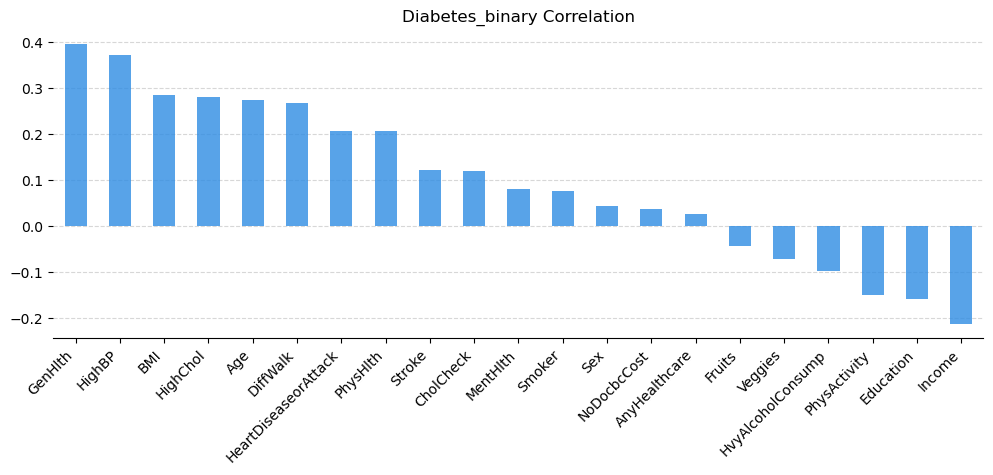

In [12]:
(df.drop(target, axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3, color='#2E8CE3')
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=10);

In [13]:
# датафрейм (предикторы) корреляция с таргетом, сортируем

corr_df = pd.DataFrame(df.drop(target, axis=1).corrwith(df.Diabetes_binary)).sort_values(0, ascending=False)

In [14]:
corr_df

,0
GenHlth,0.396571
HighBP,0.372048
BMI,0.285643
HighChol,0.281399
Age,0.274550
DiffWalk,0.267082
HeartDiseaseorAttack,0.207229
PhysHlth,0.206868
Stroke,0.122727
CholCheck,0.118900


In [15]:
# наибольшая абсолютная корреляция, предположим, по порогу 0.15

corr_df[abs(corr_df[0])>0.15]

,0
GenHlth,0.396571
HighBP,0.372048
BMI,0.285643
HighChol,0.281399
Age,0.274550
DiffWalk,0.267082
HeartDiseaseorAttack,0.207229
PhysHlth,0.206868
PhysActivity,-0.150281
Education,-0.158522


In [16]:
# признаки, у которых корреляция меньше порога

corr_df[(abs(corr_df[0])<=0.15)]

,0
Stroke,0.122727
CholCheck,0.118900
MentHlth,0.080688
Smoker,0.075853
Sex,0.042538
NoDocbcCost,0.036145
AnyHealthcare,0.027034
Fruits,-0.044560
Veggies,-0.072181
HvyAlcoholConsump,-0.098709


# Корреляционная матрица признаков

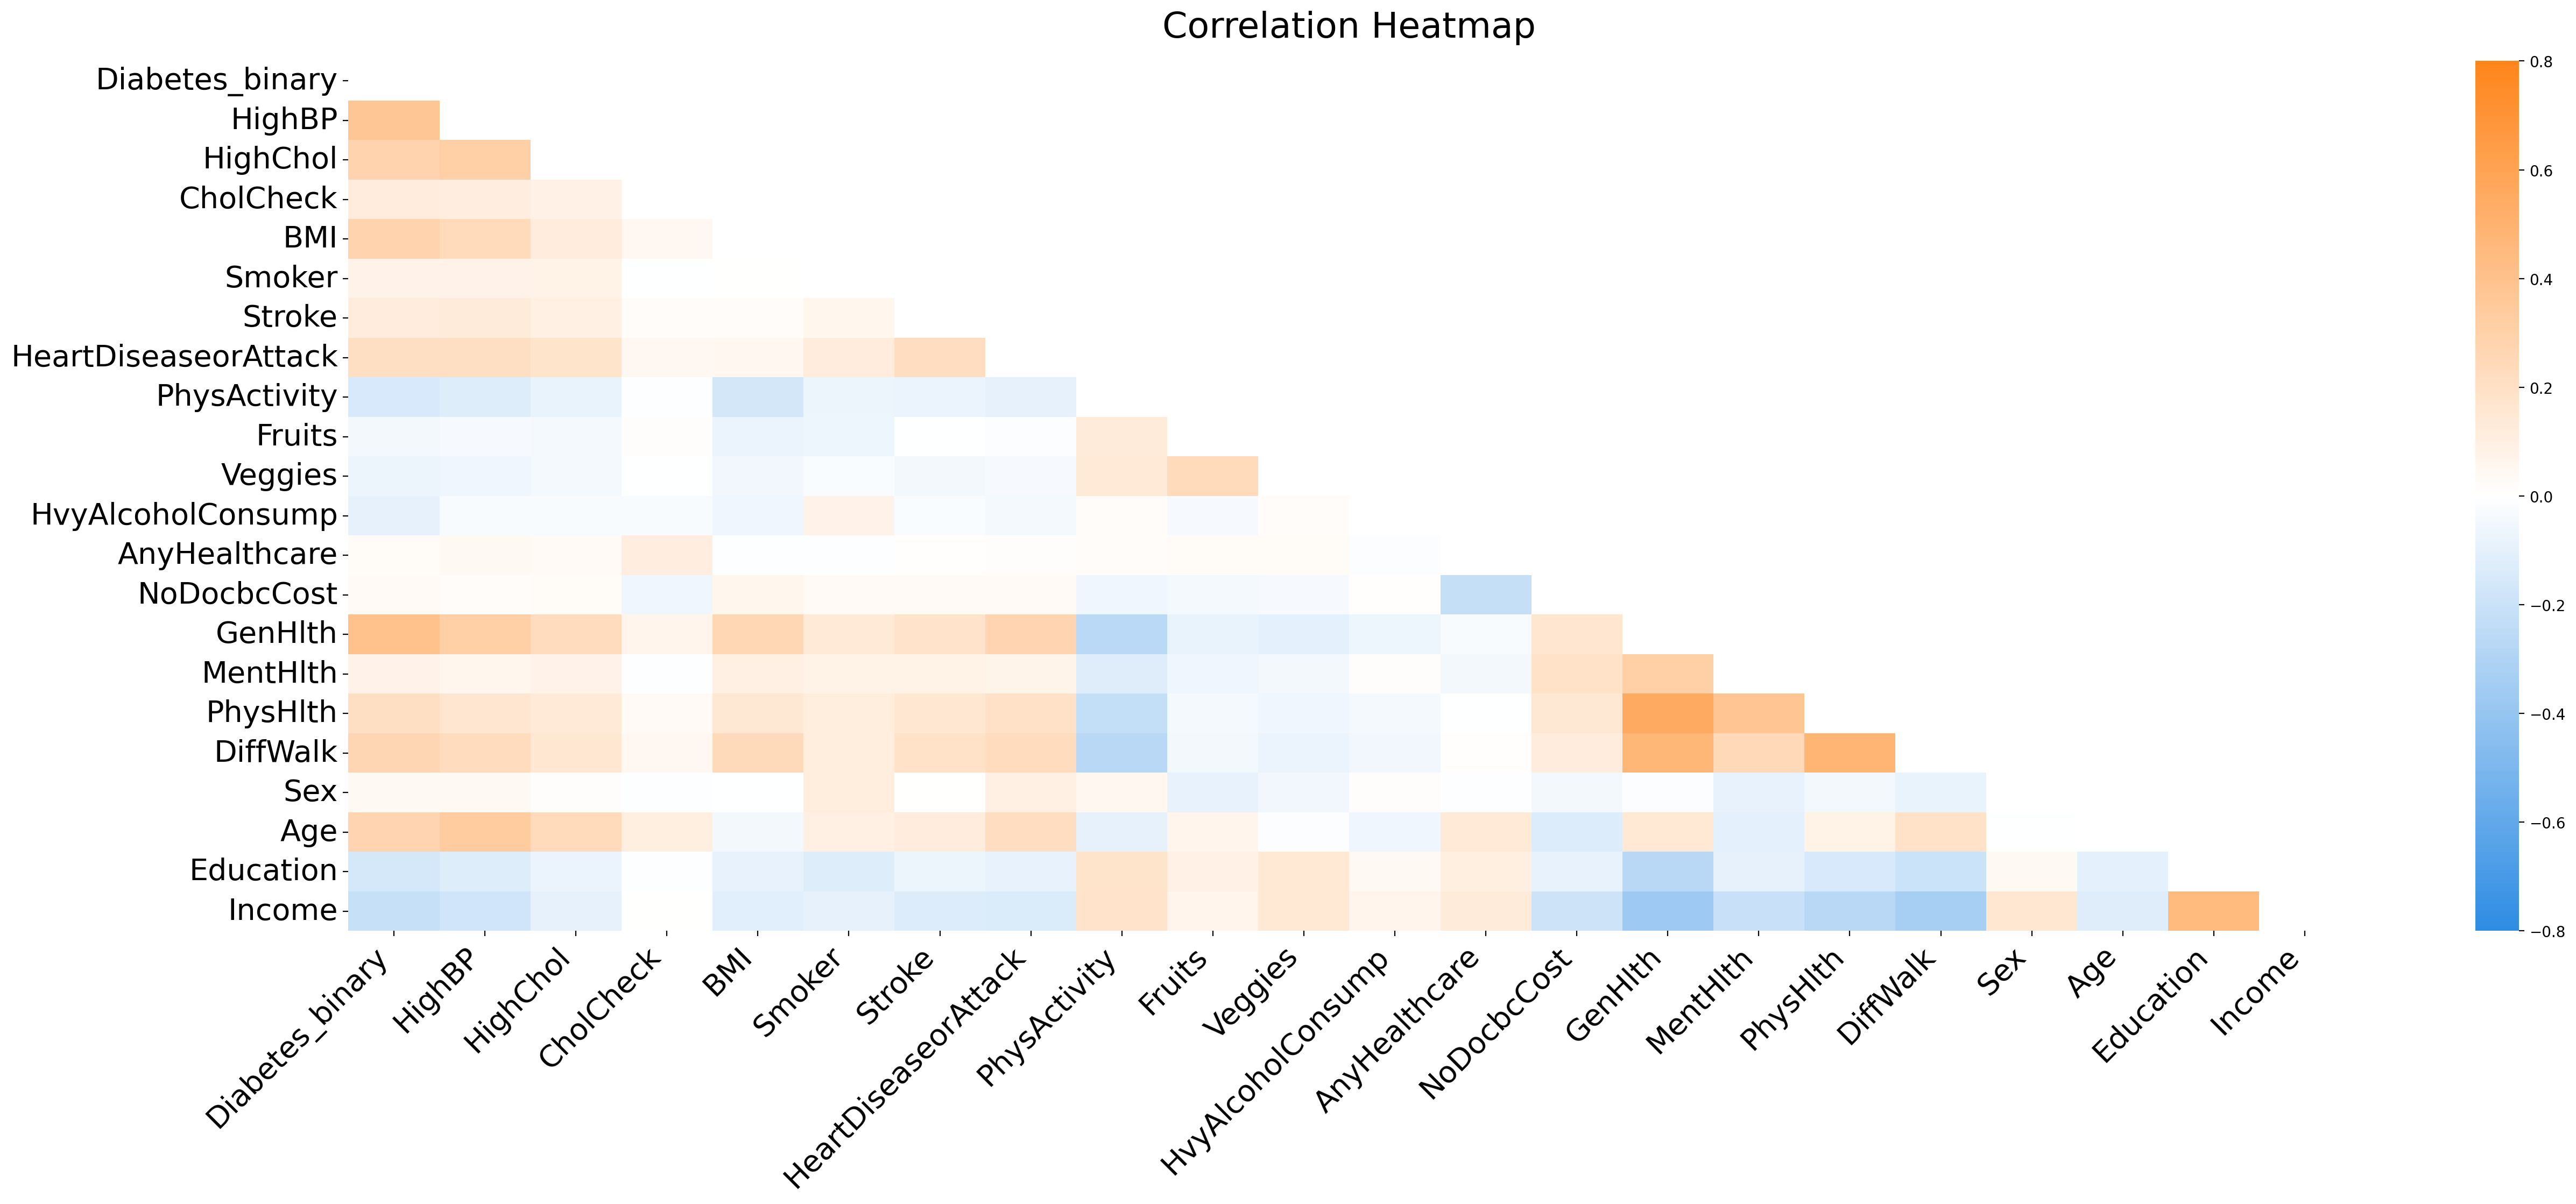

In [17]:
data_heatmap = df
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#2E8CE3', 'white', '#FF851B'])

mask = np.triu(np.ones_like(data_heatmap.corr(), dtype=bool))

lenghtsize = 30
fig, ax = plt.subplots(figsize=(lenghtsize,lenghtsize*.35), dpi=200)

heatmap = sns.heatmap(data_heatmap.corr(), cmap=custom_cmap, mask=mask, annot=False, vmin=-.8, vmax=.8)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=16);
ax.tick_params(axis='both', which='major', labelsize=20)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right');

In [18]:
# отделяем таргет от датасета (X,y)

X = df.drop(target, axis=1)
y = df.Diabetes_binary

### Критерий хи-квадрат (Chi-squared score) 

Проверяет, есть ли значимая разница между наблюдаемой и ожидаемой частотами двух категориальных переменных. Таким образом, проверяется нулевая гипотеза об отсутствии связи между двумя переменными.

$X^{2}=\frac{(\textrm{Observed frequency} - \textrm{Expected frequency})^2}{\textrm{Expected frequency}}$


Критерий независимости хи-квадрат.

Чтобы корректно применять критерий хи-квадрат для проверки связи между разными признаками из датасета и целевой переменной, необходимо соблюсти условия: переменные должны быть категориальными, независимыми и  должны иметь ожидаемую частоту больше 5. Последнее условие гарантирует, что CDF (cumulative density function) статистического критерия (test statistic) может быть аппроксимирован с помощью распределения хи-квадрат.


Ожидаемая частота – то, сколько раз значение теоретически должно появиться в выборке – должна быть больше или равна 5-10 для критерия Пирсона. Если она меньше, понадобится критерий Фишера.

In [19]:
#  В данном случае, поскольку большинство признаков категориальные и все значения 
# предикторов неотрицательны, имеет смысл провести хи-квадрат тест

chisquare = pd.DataFrame(chi2(X, y)).T.set_index(X.columns).rename(
                columns={0:'chi2_score', 1:"chi2_pValue"}).sort_values(by='chi2_score', ascending=False)

chisquare

,chi2_score,chi2_pValue
PhysHlth,51098.955612,0.000000e+00
BMI,9610.205140,0.000000e+00
MentHlth,7932.199681,0.000000e+00
Age,4942.574718,0.000000e+00
GenHlth,4655.400614,0.000000e+00
HighBP,4098.597683,0.000000e+00
DiffWalk,3652.087005,0.000000e+00
Income,2620.241677,0.000000e+00
HighChol,2562.835375,0.000000e+00
HeartDiseaseorAttack,2518.131362,0.000000e+00


In [20]:
#  Взаимная информация
mut_info = mutual_info_classif(X[bool_vars],y)
mut_df = pd.DataFrame(mut_info, columns=['Mutual_info'], index=X[bool_vars].columns)
mut_df.sort_values(by='Mutual_info',ascending=False)

,Mutual_info
HighBP,0.074118
HighChol,0.045215
DiffWalk,0.036419
HeartDiseaseorAttack,0.022814
PhysActivity,0.019150
CholCheck,0.013024
AnyHealthcare,0.010414
Veggies,0.010005
Stroke,0.007411
HvyAlcoholConsump,0.006999


Переходим к построению baseline

In [21]:
# фиксируем state

# вопросик: зачем фиксировать random state?

r_state = 42

In [22]:
# random forest с фиксированным random_state, rf_clf

rf_clf = RandomForestClassifier(random_state=r_state)

In [23]:
# разделяем выборки train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=r_state, stratify=y)

In [24]:
# обучение и предикт y_rf_0

rf_clf.fit(X_train, y_train)

y_rf_0 = rf_clf.predict(X_test)

In [25]:
# roc-auc score

roc_auc_score(y_rf_0, y_test)

0.7305056139791475

In [26]:
# classification_report

print(classification_report(y_rf_0, y_test))

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71      7748
         1.0       0.78      0.72      0.74      9517

    accuracy                           0.73     17265
   macro avg       0.73      0.73      0.73     17265
weighted avg       0.73      0.73      0.73     17265



In [27]:
# обучение и предикт y_rf_1 без признака например NoDocbcCost

rf_clf.fit(X_train.drop('NoDocbcCost', axis=1), y_train)

y_rf_1 = rf_clf.predict(X_test.drop('NoDocbcCost', axis=1))

In [28]:
# roc_auc_score

roc_auc_score(y_rf_1, y_test)

0.7284483523629848

In [29]:
# classification_report

print(classification_report(y_rf_1, y_test))

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71      7790
         1.0       0.77      0.71      0.74      9475

    accuracy                           0.73     17265
   macro avg       0.73      0.73      0.73     17265
weighted avg       0.73      0.73      0.73     17265



# Встроенные методы (embedded)

рассмотрим на примере двух моделей:
- логистическая регрессия с L1 регуляризацией
- случайный лес

*** если вы собираетесь строить каку-то модель, для которой необходимы только неотрицательные значения предикторов...

Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

Обычно достаточно нормализовать данные. Например, в глубоком обучении (Deep Learning) требуется перевести цвета изображений RGB из диапазона 0-255 к диапазону 0-1. А вот стандартизацию стоит применять при использование алгоритмов, которые основываются на измерении расстояний, например, k ближайших соседей или метод опорных векторов (SVM).

In [30]:
# шкалируем StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## Логистическая регрессия 

есть интересная реализация https://github.com/KamitaniLab/smlr

а вот не логистическая регрессия, но сюда же относится, очень интересно 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ard.html

In [31]:
# penalty='l1', C=0.01, solver='liblinear'

lr_clf = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')

In [32]:
# обучаем на шкалированных данных

lr_clf.fit(X_train_sc, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [33]:
# предсказываем

y_lr_0 = lr_clf.predict(X_test_sc)

In [34]:
# roc_auc_score

roc_auc_score(y_lr_0, y_test)

0.7444218497346919

In [35]:
# classification_report

print(classification_report(y_lr_0, y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73      8096
         1.0       0.77      0.74      0.75      9169

    accuracy                           0.74     17265
   macro avg       0.74      0.74      0.74     17265
weighted avg       0.75      0.74      0.74     17265



In [36]:
# коэффициенты np.transpose(logreg_clfr.coef_[0])
# columns=['features', 'coef']

coef_df = pd.DataFrame(zip(X_train.columns, np.transpose(lr_clf.coef_[0])), columns=['features', 'coef'])

In [37]:
coef_df

,features,coef
0,HighBP,0.354687
1,HighChol,0.285095
2,CholCheck,0.203899
3,BMI,0.521618
4,Smoker,0.000000
5,Stroke,0.029512
6,HeartDiseaseorAttack,0.091546
7,PhysActivity,-0.001732
8,Fruits,0.000000
9,Veggies,-0.028579


Посмотрим на feature importance по мнению случайного леса

In [38]:
# обучаем

rf_clf.fit(X_train, y_train)

y_rf_2 = rf_clf.predict(X_test)

In [39]:
# feature_importances_

rf_clf.feature_importances_

array([0.07448803, 0.04091658, 0.00651464, 0.17004954, 0.02892657,
       0.01004526, 0.01836259, 0.02334101, 0.02933608, 0.02254265,
       0.00950085, 0.00797791, 0.01209724, 0.10262327, 0.05268   ,
       0.06900765, 0.02499686, 0.02720409, 0.12768317, 0.05762056,
       0.08408545])

In [40]:
pd.DataFrame(zip(X_train.columns, rf_clf.feature_importances_), columns=['feature', 'importance']
            ).sort_values(by='importance', ascending=False)

,feature,importance
3,BMI,0.170050
18,Age,0.127683
13,GenHlth,0.102623
20,Income,0.084085
0,HighBP,0.074488
15,PhysHlth,0.069008
19,Education,0.057621
14,MentHlth,0.052680
1,HighChol,0.040917
8,Fruits,0.029336


## Обертки

## Прямой отбор

Мы начинаем с наиболее эффективной переменной по отношению к цели, потом выбираем другую переменную, которая дает лучшую производительность в сочетании с первой

In [41]:
# SequentialFeatureSelector(clf, k_features='best', forward = True, n_jobs=-1)
# fit

forw_feature = SequentialFeatureSelector(lr_clf, k_features='best', forward = True, n_jobs=-1)
forw_feature.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(C=0.01, penalty='l1',
                                                       solver='liblinear'),
                          k_features=(1, 21), n_jobs=-1, scoring='accuracy')

In [42]:
# предсказываем

features = list(forw_feature.k_feature_names_)


In [44]:
features

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'Age',
 'Education',
 'Income']

## Последовательный отбор

In [45]:
# сначала строим модель на полном наборе признаков

lr_clf.fit(X_train_sc, y_train)

bfs = SequentialFeatureSelector(lr_clf, k_features='best', forward = False, n_jobs=-1)

In [46]:
# обучаем

bfs.fit(X_train_sc, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(C=0.01, penalty='l1',
                                                       solver='liblinear'),
                          forward=False, k_features=(1, 21), n_jobs=-1,
                          scoring='accuracy')

In [48]:
features = list(bfs.k_feature_names_)

In [53]:
features

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '9',
 '10',
 '13',
 '14',
 '15',
 '17',
 '18',
 '19',
 '20']

In [58]:
for i in range(len(features)):
    print(X_train.columns.tolist()[int(features[i])])


HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
Veggies
HvyAlcoholConsump
GenHlth
MentHlth
PhysHlth
Sex
Age
Education
Income


### Полный перебор признаков

https://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

### Рекурсивное исключение признаков


Сначала модель обучается на начальном составе признаков, и важность каждой фичи определяется с помощью атрибутов coef_ или feature_importances_. Затем наименее важные признаки удаляются из текущего набора. Процедура рекурсивно повторяется для сокращенного набора до тех пор, пока в конечном итоге не будет достигнуто желаемое количество предикторов для выбора.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

https://scikit-learn.org/stable/modules/feature_selection.html#rfe